In [ ]:
 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [2]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [3]:
# Reading whale returns
whale_returns_csv = Path('../PandasHW/whale_returns.csv')
whale_returns = pd.read_csv(whale_returns_csv, index_col=
                            "Date", infer_datetime_format=True, parse_dates=True)
whale_returns = whale_returns.sort_index()
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [4]:
# Count nulls
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [5]:
# Drop nulls
whale_returns.dropna().copy()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


In [6]:
whale_returns = whale_returns.dropna()

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [7]:
# Reading algorithmic returns
algo_returns = pd.read_csv(('../PandasHW/algo_returns.csv'), index_col="Date", infer_datetime_format=True, parse_dates=True)
algo_returns = algo_returns.sort_index()
algo_returns.head(9)

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
2014-06-04,-0.001838,NaN
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668


In [8]:
# Count nulls
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [9]:
# Drop nulls
algo_returns.dropna().copy()


,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [10]:
# Reading S&P 500 Closing Prices
sp500_history = pd.read_csv(('../PandasHW/sp500_history.csv'), index_col="Date", infer_datetime_format=True, parse_dates=True)
sp500_history = sp500_history.sort_index()
sp500_history.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [11]:
# Check Data Types
sp500_history.dtypes

Close    object
dtype: object

In [12]:
# Fix Data Types
sp500_history["Close"] = sp500_history["Close"].str.replace("$", "")
sp500_history["Close"] = sp500_history["Close"].str.replace(",", "")
sp500_history["Close"] = sp500_history["Close"].astype("float")
sp500_history.dtypes


C:\Users\cstan\AppData\Local\Temp\ipykernel_16928\3107775848.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sp500_history["Close"] = sp500_history["Close"].str.replace("$", "")


Close    float64
dtype: object

In [13]:
# Calculate Daily Returns
sp500_returns = sp500_history.pct_change()
sp500_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [14]:
# Drop nulls
sp500_returns.dropna().copy()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


In [15]:
# Rename `Close` Column to be specific to this portfolio.
sp500_returns = sp500_returns.rename(columns={"Close": "S&P 500"})

## Combine Whale, Algorithmic, and S&P 500 Returns

In [16]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
all_port = pd.concat([whale_returns, algo_returns, sp500_returns], axis="columns" , join="inner")
all_port.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Daily Returns'}, xlabel='Date'>

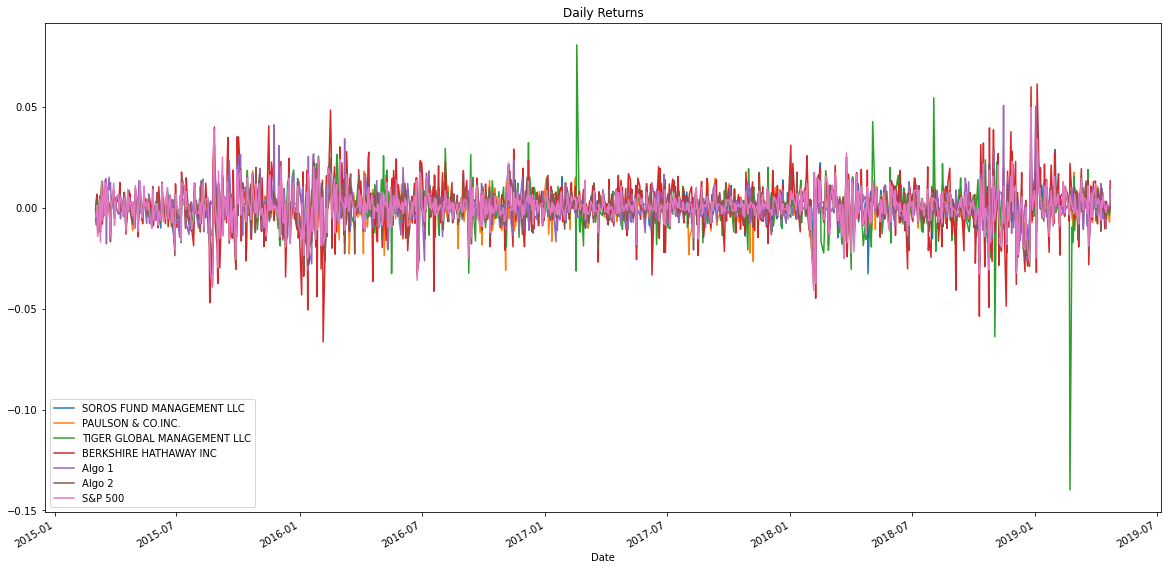

In [17]:
# Plot daily returns of all portfolios
all_port.plot(figsize=(20, 10), title="Daily Returns")

#### Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':'Cumulative Returns all Portfolios'}, xlabel='Date'>

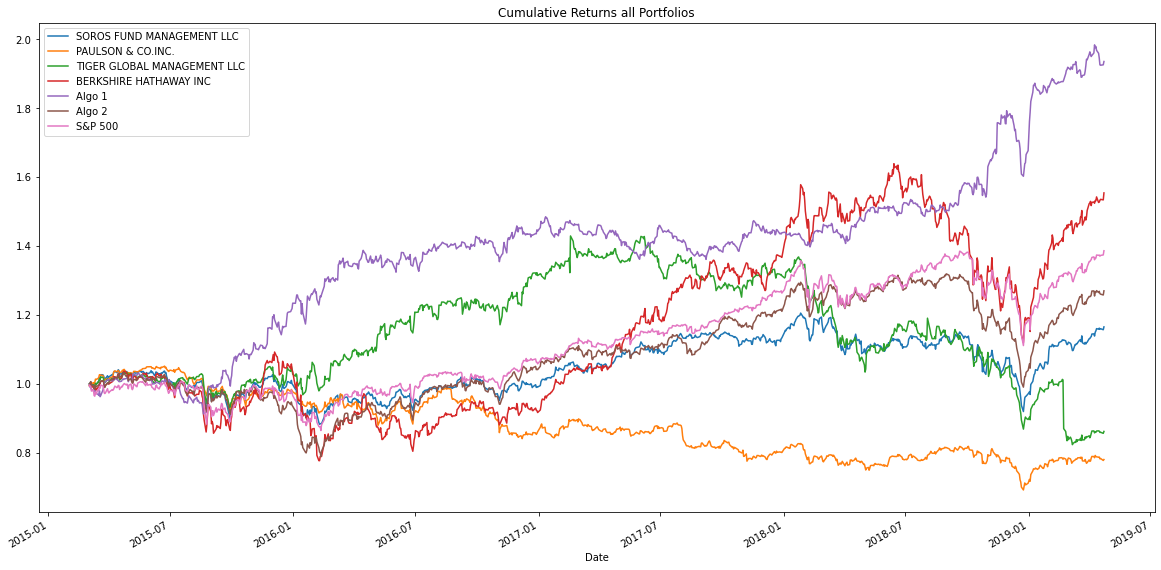

In [18]:
# Calculate cumulative returns of all portfolios
cum_returns_allports = (1 + all_port).cumprod()

# Plot cumulative returns
cum_returns_allports.plot(figsize=(20,10), title="Cumulative Returns all Portfolios")


In [19]:
cum_returns_allports.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,0.998734,0.995019,0.999504,0.993431,0.998058,0.999051,0.995461
2015-03-04,1.000962,0.998245,0.996972,0.997617,0.989486,1.001464,0.991093
2015-03-05,1.004981,1.002314,0.999319,1.004327,0.988541,1.005794,0.992278
2015-03-06,0.997037,0.998731,0.990844,0.991172,0.983641,0.994267,0.978214
2015-03-09,0.997617,1.002951,0.996633,0.989534,0.978283,0.995563,0.982072


---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:title={'center':'Portfolio Risk'}>

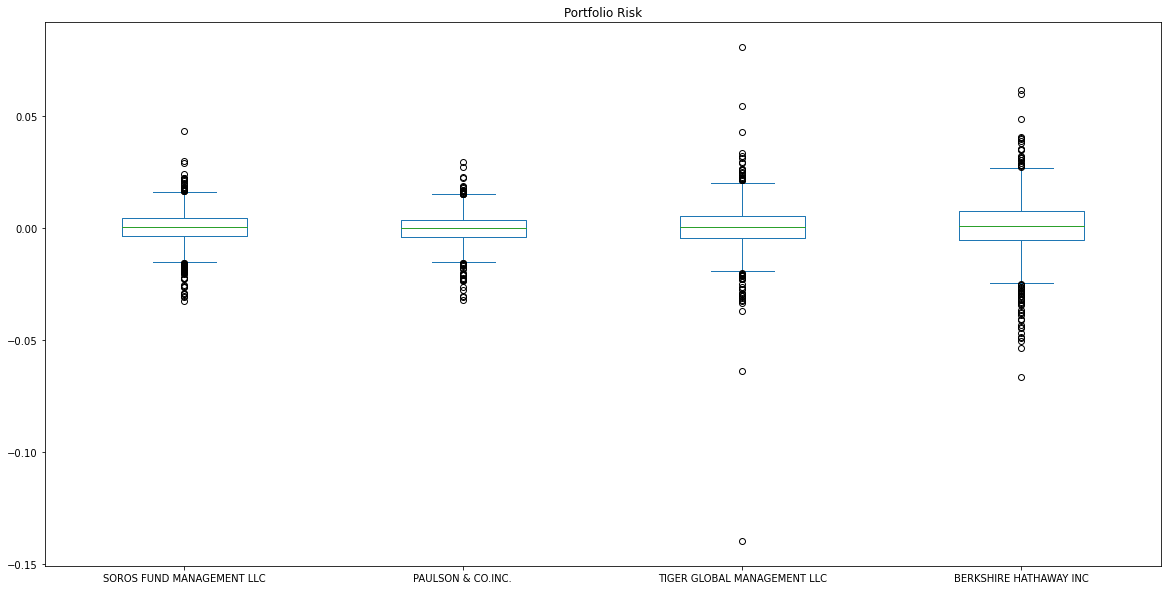

In [20]:
# Box plot to visually show risk
whale_returns.plot(kind="box",figsize=(20,10), title="Portfolio Risk")

<AxesSubplot:title={'center':'Portfolio Risk'}>

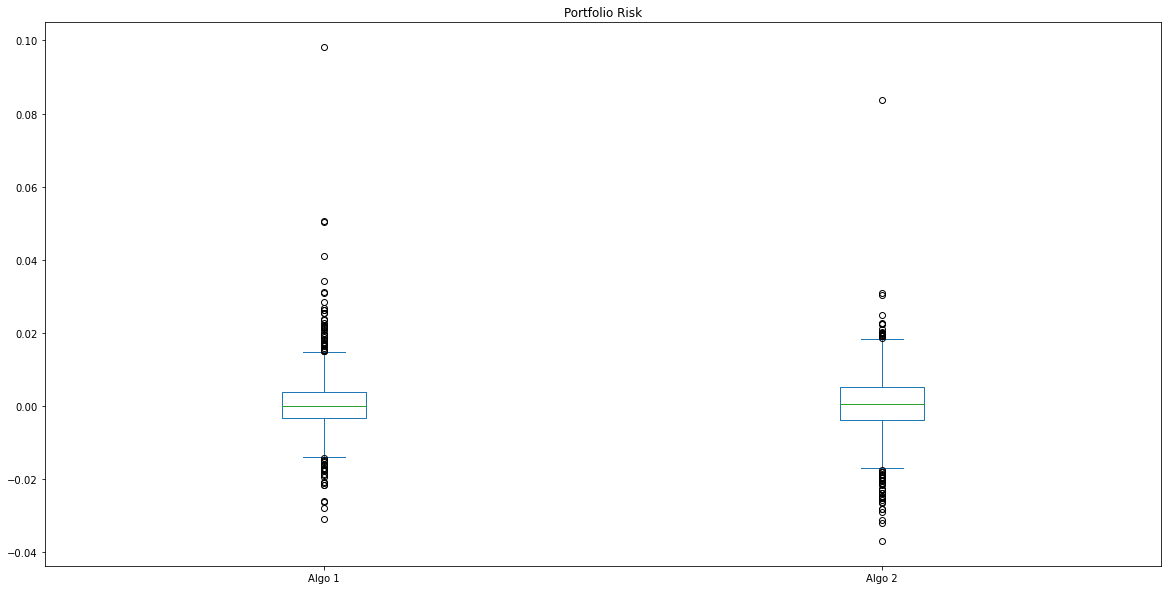

In [21]:
algo_returns.plot(kind="box",figsize=(20,10), title="Portfolio Risk")

<AxesSubplot:title={'center':'Portfolio Risk'}>

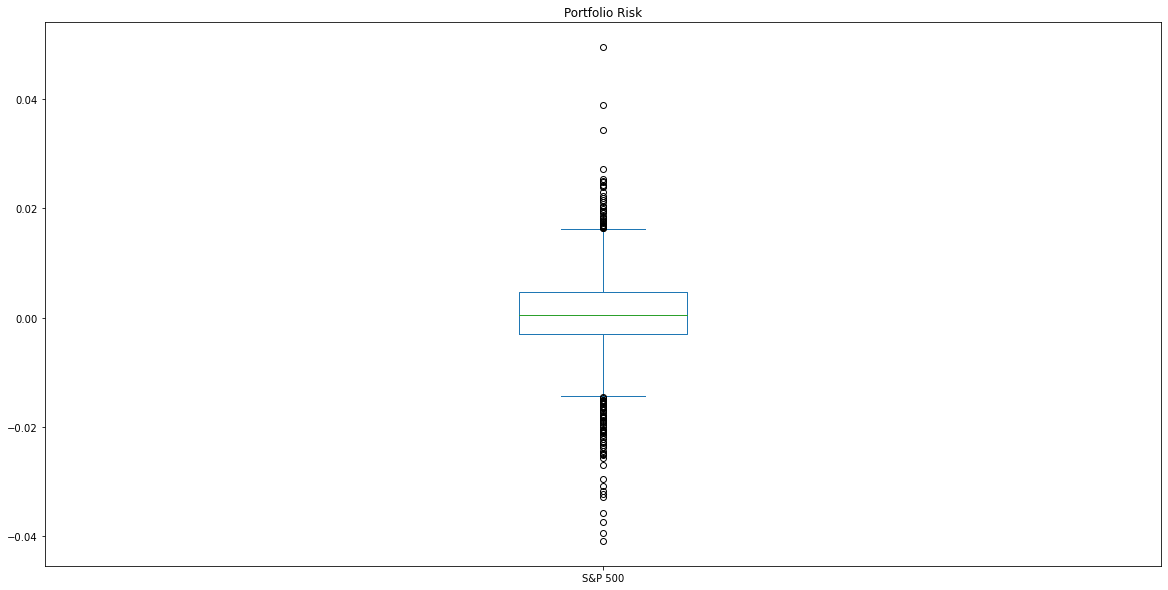

In [22]:
sp500_returns.plot(kind="box",figsize=(20,10), title="Portfolio Risk")

<AxesSubplot:title={'center':'Portfolio Risk'}>

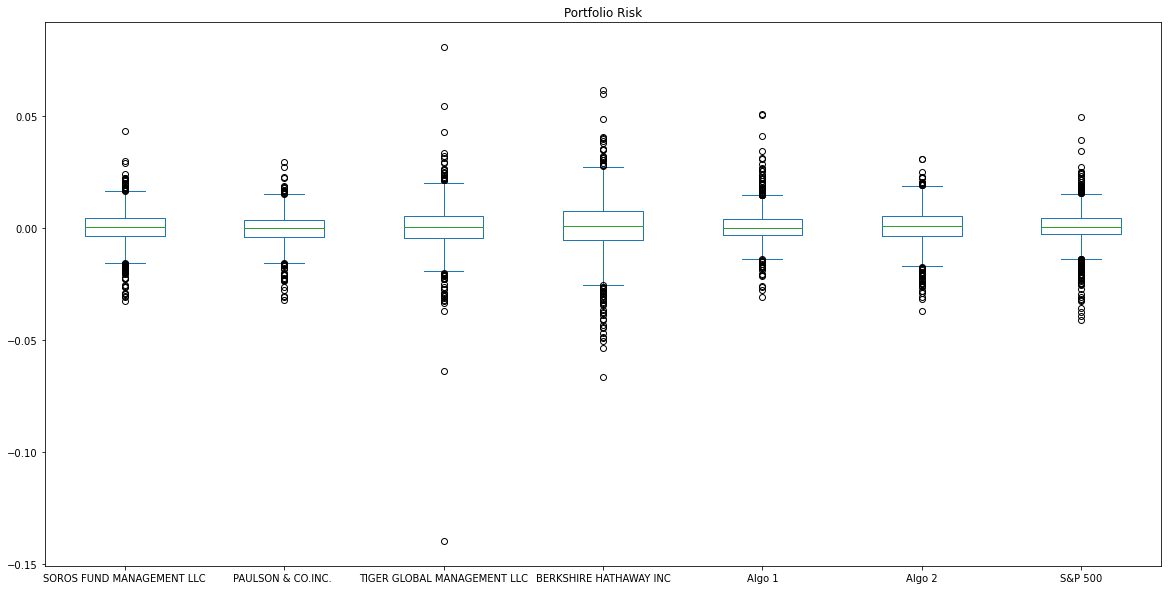

In [23]:
all_port.plot(kind="box",figsize=(20,10), title="Portfolio Risk")

### Calculate Standard Deviations

In [24]:
# Calculate the daily standard deviations of all portfolios
daily_std = all_port.std()
daily_std

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
S&P 500                        0.008554
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [25]:
# Calculate  the daily standard deviation of S&P 500
sp500_risk = all_port["S&P 500"].std()
# Determine which portfolios are riskier than the S&P 500
all_port.std() > sp500_risk

SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
S&P 500                        False
dtype: bool

### Calculate the Annualized Standard Deviation

In [26]:
# Calculate the annualized standard deviation (252 trading days)
annual_std = daily_std * np.sqrt(252)
annual_std

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
S&P 500                        0.135786
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':'21day Rolling Standard Deviation'}, xlabel='Date'>

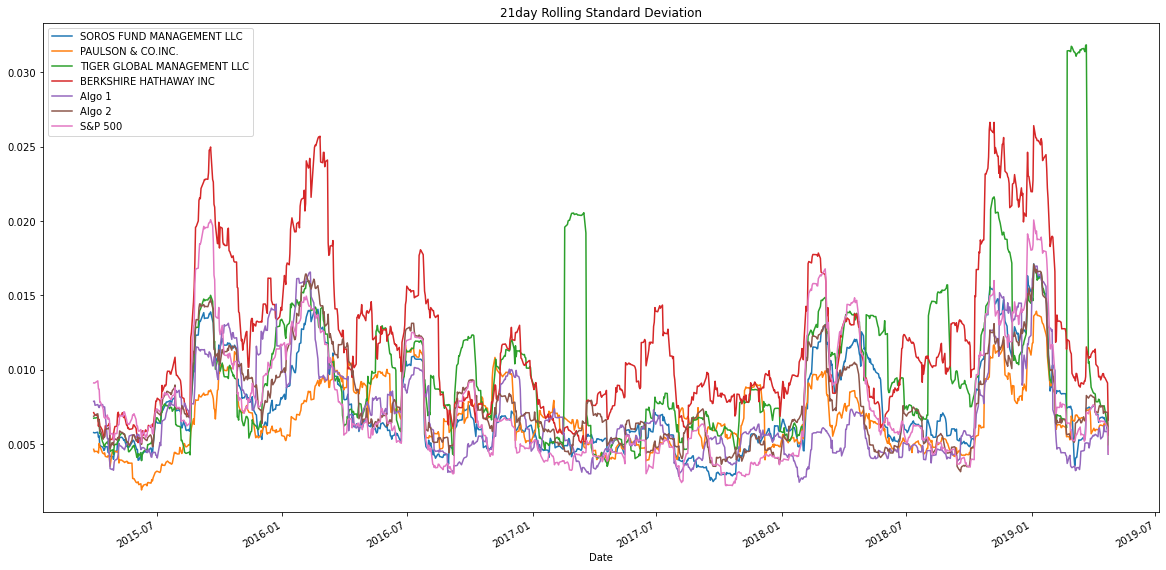

In [27]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
all_port_rolling_std = all_port.rolling(window=21).std()

# Plot the rolling standard deviation
all_port_rolling_std.plot(figsize=(20,10), title="21day Rolling Standard Deviation")

### Calculate and plot the correlation

In [28]:
# Calculate the correlation
all_port_corr = all_port.corr()
all_port_corr
# Display de correlation matrix
all_port_corr.style.background_gradient(cmap="autumn")

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
S&P 500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


<AxesSubplot:title={'center':'Tiger Global Beta'}, xlabel='Date'>

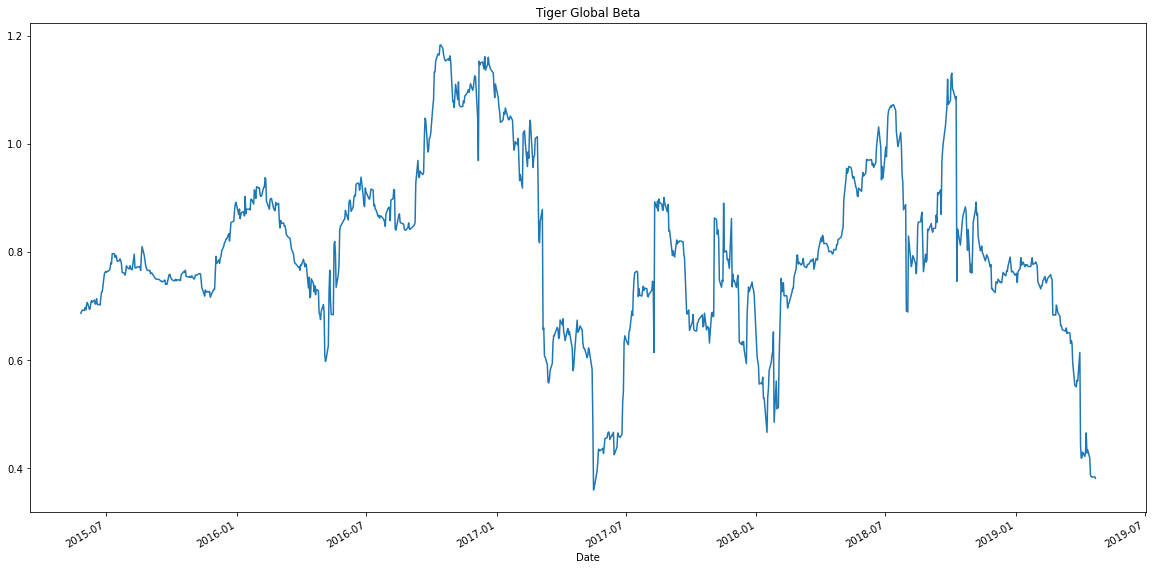

In [29]:
# Calculate covariance of a single portfolio
covariance = all_port["TIGER GLOBAL MANAGEMENT LLC"].rolling(window=60).cov(all_port["S&P 500"])
# Calculate variance of S&P 500
variance = all_port["S&P 500"].rolling(60).var()
# Computing beta
beta = covariance / variance
# Plot beta trend
beta.plot(figsize=(20,10), title="Tiger Global Beta")

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

<AxesSubplot:title={'center':'Exponentially Weighted Average'}, xlabel='Date'>

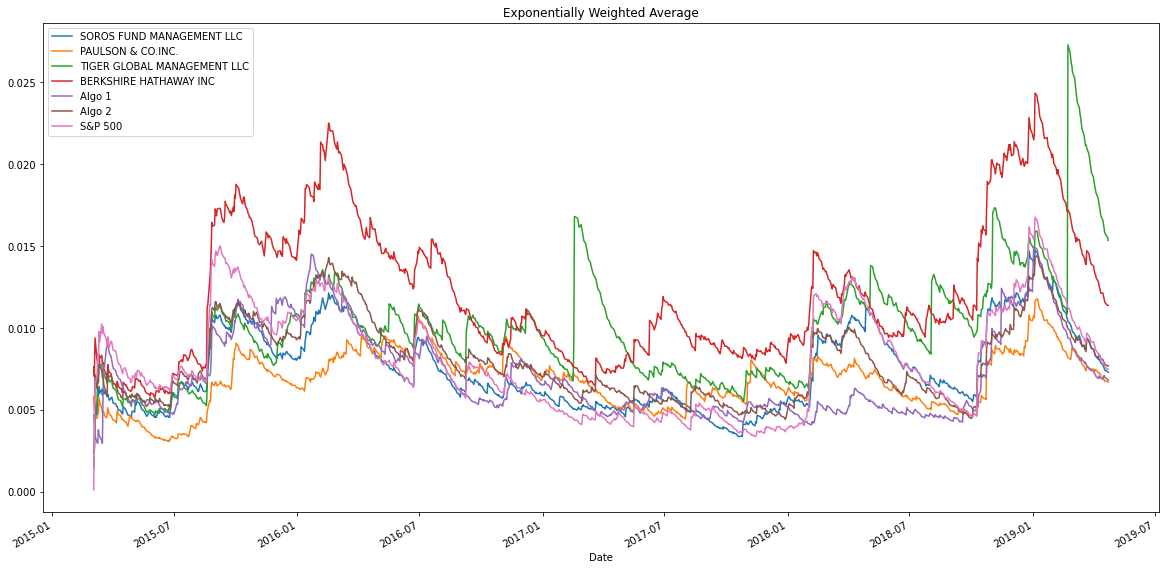

In [30]:
# Use `ewm` to calculate the rolling window
all_port.ewm(halflife=21).std().plot(figsize=(20,10), title="Exponentially Weighted Average")

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [31]:
# Annualized Sharpe Ratios
all_port_sharpe = (all_port.mean()*252) / (daily_std*np.sqrt(252))
all_port_sharpe

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
S&P 500                        0.648267
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

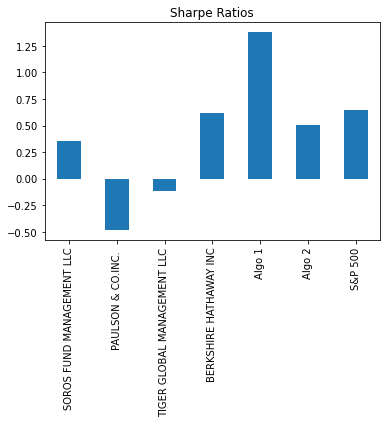

In [32]:
# Visualize the sharpe ratios as a bar plot
all_port_sharpe.plot(kind="bar",title="Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

Algo 1 outperforms both the market and the whales portfolios.
Algo 2 outperforms Soros, Paulson, and Tiger but underperforms the market and Berkshire.

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [33]:
# Reading data from 1st stock
de_returns = Path("../PandasHW/de_returns.csv")
de_returns = pd.read_csv(de_returns,index_col="Date", infer_datetime_format=True, parse_dates=True)
de_returns = de_returns.sort_index()
de_returns.head()

,Close
Date,
2017-04-24,110.25
2017-04-25,113.15
2017-04-26,112.55
2017-04-27,111.18
2017-04-28,111.61


In [34]:
#testing
de_daily_returns = de_returns.pct_change()
de_daily_returns.head()

,Close
Date,
2017-04-24,NaN
2017-04-25,0.026304
2017-04-26,-0.005303
2017-04-27,-0.012172
2017-04-28,0.003868


In [35]:
# Reading data from 2nd stock
cat_returns = Path("../PandasHW/cat_returns.csv")
cat_returns = pd.read_csv(cat_returns,index_col="Date",infer_datetime_format=True,parse_dates=True)
cat_returns = cat_returns.sort_index()
cat_returns.head()

,Close
Date,
2017-04-24,96.81
2017-04-25,104.42
2017-04-26,104.66
2017-04-27,102.68
2017-04-28,102.26


In [36]:
# Reading data from 3rd stock
f_returns = Path("../PandasHW/f_returns.csv")
f_returns = pd.read_csv(f_returns,index_col="Date",infer_datetime_format=True,parse_dates=True)
f_returns = f_returns.sort_index()
f_returns.head()

,Close
Date,
2017-04-24,11.43
2017-04-25,11.48
2017-04-26,11.60
2017-04-27,11.47
2017-04-28,11.47


In [37]:
# Combine all stocks in a single DataFrame
my_returns = pd.concat([de_returns,cat_returns,f_returns],axis="columns",join="inner")
my_returns.head()

,Close,Close,Close
Date,,,
2017-04-24,110.25,96.81,11.43
2017-04-25,113.15,104.42,11.48
2017-04-26,112.55,104.66,11.60
2017-04-27,111.18,102.68,11.47
2017-04-28,111.61,102.26,11.47


In [38]:
# Reset Date index
#do I need to do this?
#my_returns = my_returns.reset_index()
#my_returns.head()

In [39]:
# Reorganize portfolio data by having a column per symbol
my_returns.columns = ["DE","CAT","F"]
my_returns.head(4)

,DE,CAT,F
Date,,,
2017-04-24,110.25,96.81,11.43
2017-04-25,113.15,104.42,11.48
2017-04-26,112.55,104.66,11.60
2017-04-27,111.18,102.68,11.47


In [40]:
# Calculate daily returns
pct_returns = my_returns.pct_change()
# Drop NAs
pct_returns = pct_returns.dropna().copy()
# Display sample data
pct_returns

,DE,CAT,F
Date,,,
2017-04-25,0.026304,0.078608,0.004374
2017-04-26,-0.005303,0.002298,0.010453
2017-04-27,-0.012172,-0.018918,-0.011207
2017-04-28,0.003868,-0.004090,0.000000
2017-05-01,0.003226,-0.002543,-0.004359
...,...,...,...
2019-04-15,0.006379,-0.006728,-0.012698
2019-04-16,0.012739,0.012692,0.003215
2019-04-17,0.005408,0.004999,0.014957


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [41]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_returns = pct_returns.dot(weights)
# Display sample data
portfolio_returns.head()

Date
2017-04-25    0.036429
2017-04-26    0.002483
2017-04-27   -0.014099
2017-04-28   -0.000074
2017-05-01   -0.001225
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [42]:
# Join your returns DataFrame to the original returns DataFrame
all_port["Custom"] = portfolio_returns
all_port.tail()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
Date,,,,,,,,
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509,0.009549
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274,0.008455
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579,0.010455
2019-04-22,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,0.001012,-0.009062
2019-04-23,0.007167,0.003485,0.006472,0.013278,0.004969,0.009622,0.008841,NaN


In [43]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
all_port = all_port.dropna().copy()
all_port.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
Date,,,,,,,,
2017-04-25,0.005335,-0.000904,-0.000303,0.007220,0.008136,0.006739,0.006095,0.036429
2017-04-26,0.003868,0.006180,-0.010733,0.010105,-0.005080,0.004459,-0.000490,0.002483
2017-04-27,0.002225,0.004637,-0.001710,0.000822,-0.005333,-0.001183,0.000553,-0.014099
2017-04-28,-0.000972,-0.000331,-0.005298,-0.005322,0.004049,-0.006033,-0.001913,-0.000074
2017-05-01,0.001192,0.001822,-0.007842,0.009554,-0.010498,0.002969,0.001732,-0.001225


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [44]:
# Calculate the annualized `std`
risk = all_port.std() * np.sqrt(252)
risk

SOROS FUND MANAGEMENT LLC      0.130353
PAULSON & CO.INC.              0.110191
TIGER GLOBAL MANAGEMENT LLC    0.190001
BERKSHIRE HATHAWAY INC         0.208340
Algo 1                         0.110084
Algo 2                         0.123511
S&P 500                        0.136104
Custom                         0.217830
dtype: float64

### Calculate and plot rolling `std` with 21-day window

In [45]:
# Calculate rolling standard deviation
all_port_rolling_std = all_port.rolling(window=21).std()
all_port_rolling_std

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
Date,,,,,,,,
2017-04-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-04-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-04-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-04-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2019-04-15,0.006804,0.006225,0.007525,0.009729,0.005496,0.007572,0.006517,0.011783
2019-04-16,0.006711,0.006224,0.007532,0.009731,0.005760,0.007053,0.006498,0.011630
2019-04-17,0.006773,0.006370,0.007574,0.009485,0.006229,0.007165,0.006537,0.011668


<AxesSubplot:title={'center':'21day Rolling Standard Deviation'}, xlabel='Date'>

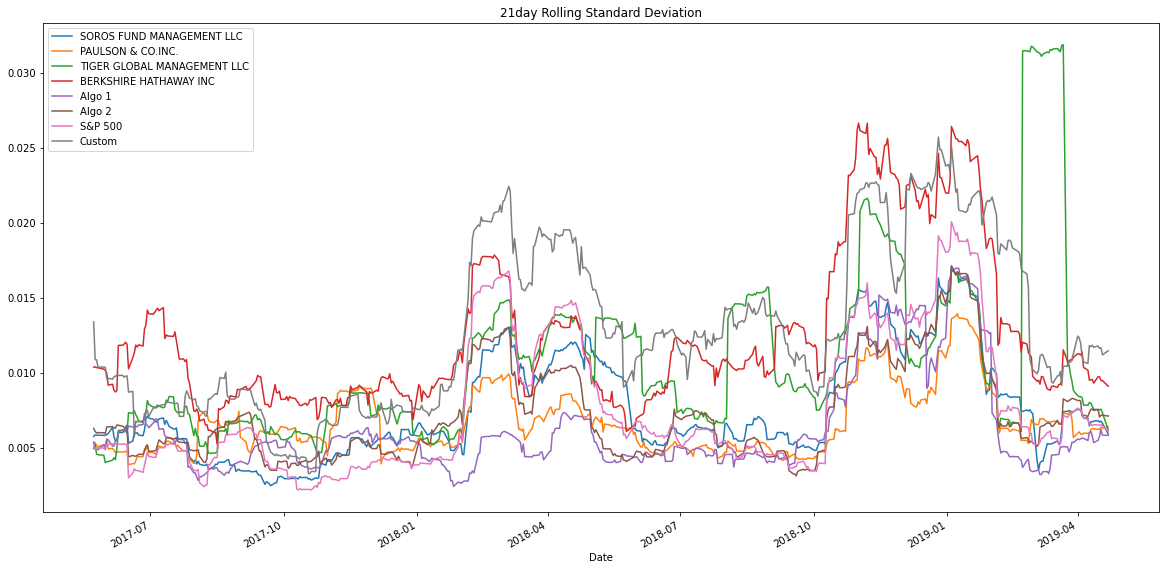

In [46]:
# Plot the rolling standard deviation
all_port_rolling_std.plot(figsize=(20,10), title="21day Rolling Standard Deviation")

In [47]:
# Calculate and plot the correlation
all_port_corr = all_port.corr()
all_port_corr.style.background_gradient(cmap="autumn")

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
SOROS FUND MANAGEMENT LLC,1.000000,0.712502,0.506423,0.766184,0.282307,0.802422,0.820122,0.640705
PAULSON & CO.INC.,0.712502,1.000000,0.460105,0.585149,0.293333,0.735462,0.713211,0.552168
TIGER GLOBAL MANAGEMENT LLC,0.506423,0.460105,1.000000,0.370864,0.110857,0.462169,0.552785,0.408960
BERKSHIRE HATHAWAY INC,0.766184,0.585149,0.370864,1.000000,0.252428,0.746568,0.807810,0.604399
Algo 1,0.282307,0.293333,0.110857,0.252428,1.000000,0.288648,0.246475,0.198441
Algo 2,0.802422,0.735462,0.462169,0.746568,0.288648,1.000000,0.870073,0.683409
S&P 500,0.820122,0.713211,0.552785,0.807810,0.246475,0.870073,1.000000,0.757026
Custom,0.640705,0.552168,0.408960,0.604399,0.198441,0.683409,0.757026,1.000000


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:title={'center':'Custom Beta'}, xlabel='Date'>

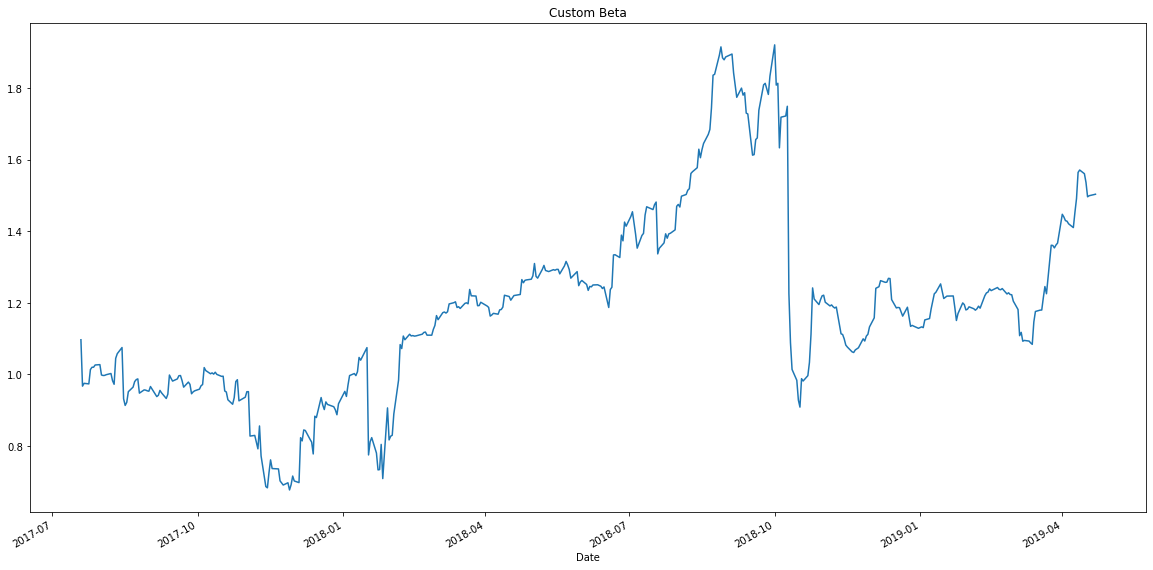

In [48]:
# Calculate and plot Beta
covariance = all_port["Custom"].rolling(60).cov(all_port["S&P 500"])
variance = all_port["S&P 500"].rolling(60).var()
beta = covariance/variance
beta.plot(figsize=(20,10), title="Custom Beta")


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [49]:
# Calculate Annualized Sharpe Ratios
sharpe_ratios = (all_port.mean()*252)/(all_port.std()*np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.374885
PAULSON & CO.INC.             -0.407489
TIGER GLOBAL MANAGEMENT LLC   -1.189216
BERKSHIRE HATHAWAY INC         0.922233
Algo 1                         1.408632
Algo 2                         0.621272
S&P 500                        0.817800
Custom                         0.634927
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

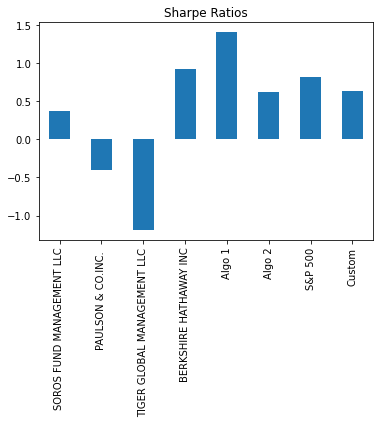

In [50]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar",title="Sharpe Ratios")

### How does your portfolio do?

Write your answer here!

The Custom portfolio is middle of the road.  Sharpe ratio analysis shows it beats Soros, Paulson, Tiger and Algo2 but is inferior to Berkshire, Algo1 and the S&P500.